# Pyber Ride Sharing

### Analysis

* __Observed Trend 1__: Urban area has the most riders, drivers, and fares 
* __Observed Trend 2__: Rural area has the less riders and drivers, however, the total fares % is around 6.7% which is more than expected proportionally(riders =5.3%, riders=3.1%). This indicates that, the demand for drivers is higher and thus may cause riders more money to have a ride in the rural area per trip. (distance might be another possible factor that cause the higher fee) The scatter plot also support the same idea
* __Observed Trend 3__: Although Urban area has the most riders and rivers, but the average fares are fairly low. This could be caused by the surplus supplies of drivers (77.85% driver > 68.4% riders from pie chart) and / or possibly shorter ride distance per ride. 

In [1]:
# Import pandas, numpy, maplotlib, or seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pull in City Data and Ride Data
CityData = pd.read_csv("Pyber/raw_data/city_data.csv")
RideData = pd.read_csv("Pyber/raw_data/ride_data.csv")
RideData.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [2]:
#Validating data in Ride Date to make sure there are no duplicate rows, using city+date+fare+ride_id as unique ID
RGroup = RideData.groupby(['city']+['date']+['fare']+['ride_id'])
a = int(len(RGroup)) 
b = int(len(RideData))

if a == b:
    print ('no need to consolidate RideData')
else:
    RideData = RideData.drop.duplicates()
#Validating data in City Date to make sure there are no duplicate rows, using city as unique ID (known Type has unique value)
c = CityData['city'].nunique()
d = CityData['city'].count()
    
if c == d:
    print ('no need to consolidate CityData')
#If any City has more than one row of data, combine the driver_count so that each city only has one driver count
#known Type has unique value
else:
    CGroup = CityData.groupby(['city']+['type'])
    CityData = CGroup['driver_count'].sum()
    CityData = CityData.reset_index()
    e = CityData['city'].count()
    print ('CityData consolidated from '+str(d)+' to ' +str(e))

no need to consolidate RideData
CityData consolidated from 126 to 125


In [3]:
#Pull the Type and Driver_Count to the RideData from CityData
CityRide = pd.merge(RideData,CityData,how='left',on='city')
CityRide.head()

,city,date,fare,ride_id,type,driver_count
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,Urban,46
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,Urban,35
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,Urban,55
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,Urban,68
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,Urban,8


### Bubble Plot of Ride Sharing Data

In [4]:
# calculate variables that will be used in the Bubble Plot
GCityRide = CityRide.groupby(['city']+['type']+['driver_count'])

# Calculate Average fare($) Per City
Ave_Fare = GCityRide['fare'].mean()

# Calculate Total Number of Rides Per City
Total_Rides = GCityRide['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

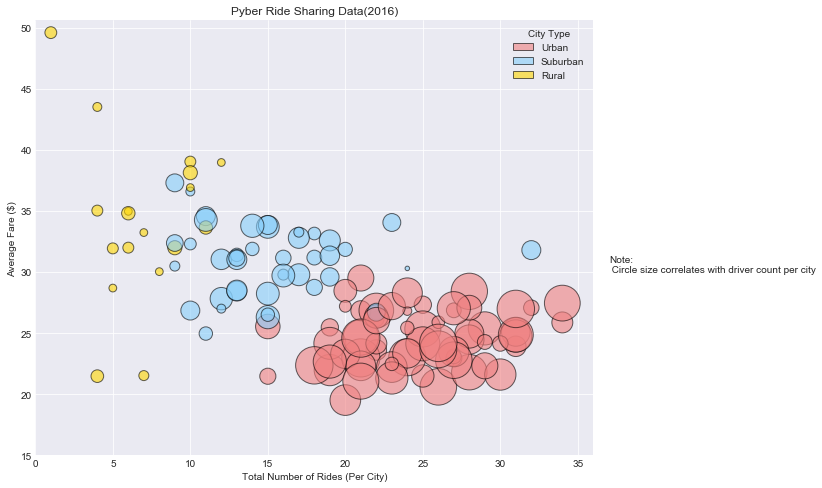

In [5]:
# use the scatter function
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

#update legend
import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

#Draw Bubble Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

 # Set x and y limits
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(15, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(37,30,'Note:\n Circle size correlates with driver count per city')

plt.show()

### Total Fares by City Type

In [6]:
# calculate variables that will be used in the Pie Chart
GType = CityRide.groupby(['type'])
GGType = CityData.groupby(['type'])

# Calculate Total fare($) Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1

,type,TotalDrivers,TotalFare,TotalRides
0,Rural,104,4255.09,125
1,Suburban,638,19317.88,625
2,Urban,2607,40078.34,1625


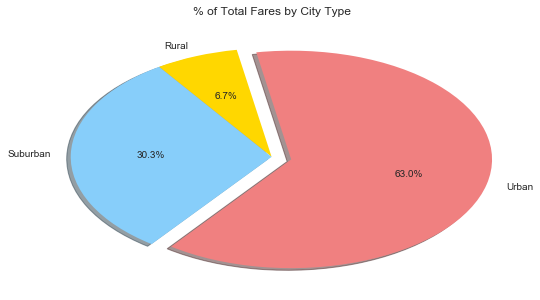

In [7]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")
# Prints our pie chart to the screen
plt.show()

### Total Rides by City Type

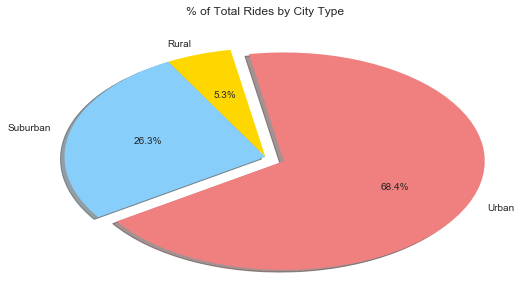

In [8]:
# Plot % of Total Rides by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalRides']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Rides by City Type")
# Prints our pie chart to the screen
plt.show()

### Total Drivers by City Type

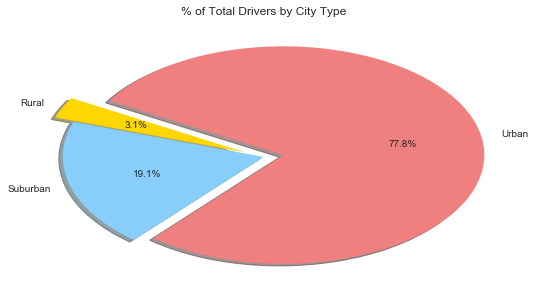

In [9]:
# Plot % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalDrivers']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.1)

# Creates the pie chart based upon the values above 
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            
# Update Title
plt.title("% of Total Drivers by City Type")
# Prints our pie chart to the screen
plt.show()